# Import Librarys and Setup

In [24]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Load Iris Dataset

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                    header=None,
                    encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
y = df.iloc[0:100, 4].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)

In [17]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0:100, [0, 2]].values

# Data Visualization (Specific Feature)

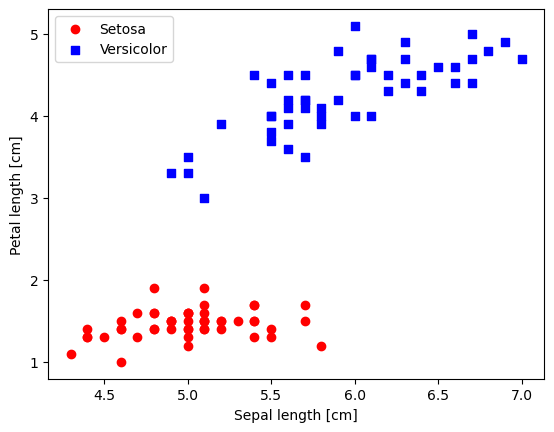

In [18]:
plt.scatter(X[:50, 0], X[:50, 1],
            color="red", marker='o', label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
            color="blue", marker='s', label="Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")

plt.show()

# Definition of Perceptron Algorithm

In [19]:
class Perceptron:
    """This class build the Perceptron Algorithm

    Parameters:
        eta: float
            Learning rate (between 0.0 and 1.0)
        n_iter: int
            Passes over the training dataset.
        radom_state: int
            Random number generator seed for random weight initialization.

    Attributes
        w_: 1d-array
            Weights after fitting.
        b_: Scalar
            Bias unit after fitting.
        errors_: list
            Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    

    def fit(self, X, y):
        """This function training the Perceptron Algorithm

        Args:
            X (array-like): [n_examples, n_features]. Training vectors.
            y (_type_): [n_examples]. Target values.
        Returns:
            self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        """This function calculates the net input

        Args:
            X (_type_): Training data
        """
        return np.dot(X, self.w_) + self.b_
    

    def predict(self, X):
        """This fuction return the class laber after unit step

        Args:
            X (_type_): Test set
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Fit Perceptron

In [21]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Text(0, 0.5, 'Number of Updates')

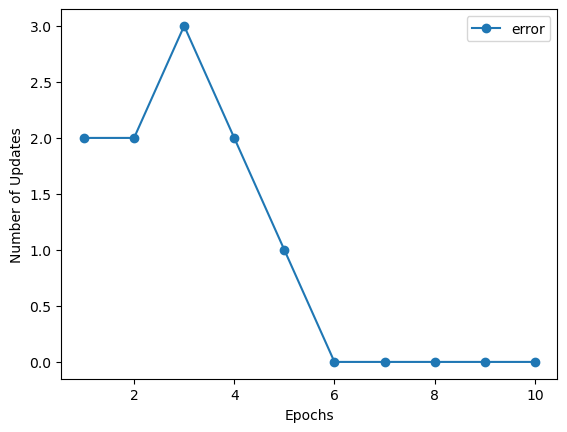

In [23]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o', label="error")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Number of Updates")

# Plot the Decision Boundary

In [28]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    """This function plot the decision boundary of the Classifier

    Args:
        X (_type_): Input dataset
        y (_type_): Target dataset
        classifier (_type_): Classifier used to generate the decision boundary
        resolution (float, optional): _description_. Defaults to 0.02.
    """
    markers = ('o', 's', '^', 'v', '<')
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black"
        )

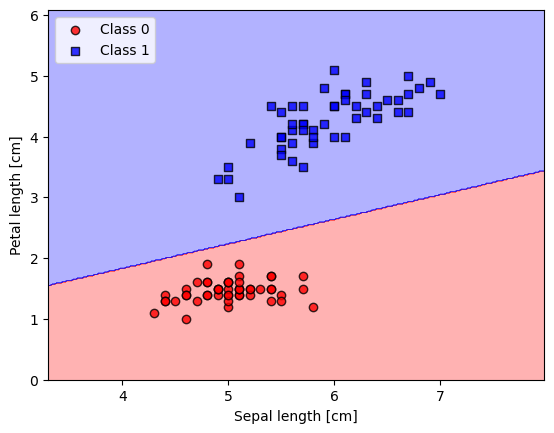

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()